In [37]:
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn import preprocessing
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
import time
from sklearn.linear_model import LogisticRegressionCV
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
import warnings
warnings.filterwarnings('ignore')

In [38]:
faces = fetch_lfw_people(min_faces_per_person=70)

In [39]:
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Tony Blair']
(1288, 62, 47)


In [40]:
faces.data.shape

(1288, 2914)

In [41]:
faces.target.shape

(1288,)

In [42]:
X = faces.data
Y = faces.target

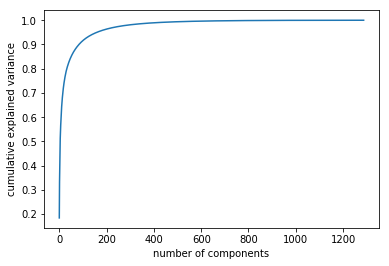

In [43]:
pca = PCA()
pca.fit(X)
arr = np.cumsum(pca.explained_variance_ratio_)
fig, ax = plt.subplots( nrows=1, ncols=1 )
plt.plot(arr)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
fig.savefig('variance.png')

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.125, random_state=42)

In [45]:
X_train.shape

(1127, 2914)

In [46]:
clf = LogisticRegressionCV(cv=5, multi_class='multinomial')

In [47]:
l = [0.85, 0.90, 0.95, 0.99 ,1.00]
print("without using PCA")
start = time.time()
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
end = time.time()
print("time consumed ", end - start, " accuracy score ", accuracy_score(pred, y_test))
print()
for i in l:
    print("retain ", i * 100, "% of the variance ")
    ncp = np.searchsorted(arr, i)
    print("component number= ", ncp)
    pca = PCA(n_components = ncp, svd_solver='randomized')
    pca.fit(X)
    X_train_reduce = pca.transform(X_train)
    X_test_reduce = pca.transform(X_test)
    start = time.time()
    clf.fit(X_train_reduce, y_train)
    pred = clf.predict(X_test_reduce)
    end = time.time()
    print("time consumed ", end - start, " accuracy score ", accuracy_score(pred, y_test))
    print()

without using PCA
time consumed  52.8457293510437  accuracy score  0.8322981366459627

retain  85.0 % of the variance 
component number=  51
time consumed  11.371573686599731  accuracy score  0.8198757763975155

retain  90.0 % of the variance 
component number=  84
time consumed  10.350826501846313  accuracy score  0.8012422360248447

retain  95.0 % of the variance 
component number=  159
time consumed  9.302653551101685  accuracy score  0.8260869565217391

retain  99.0 % of the variance 
component number=  409
time consumed  10.977468490600586  accuracy score  0.8012422360248447

retain  100.0 % of the variance 
component number=  1284
time consumed  24.42171287536621  accuracy score  0.8260869565217391



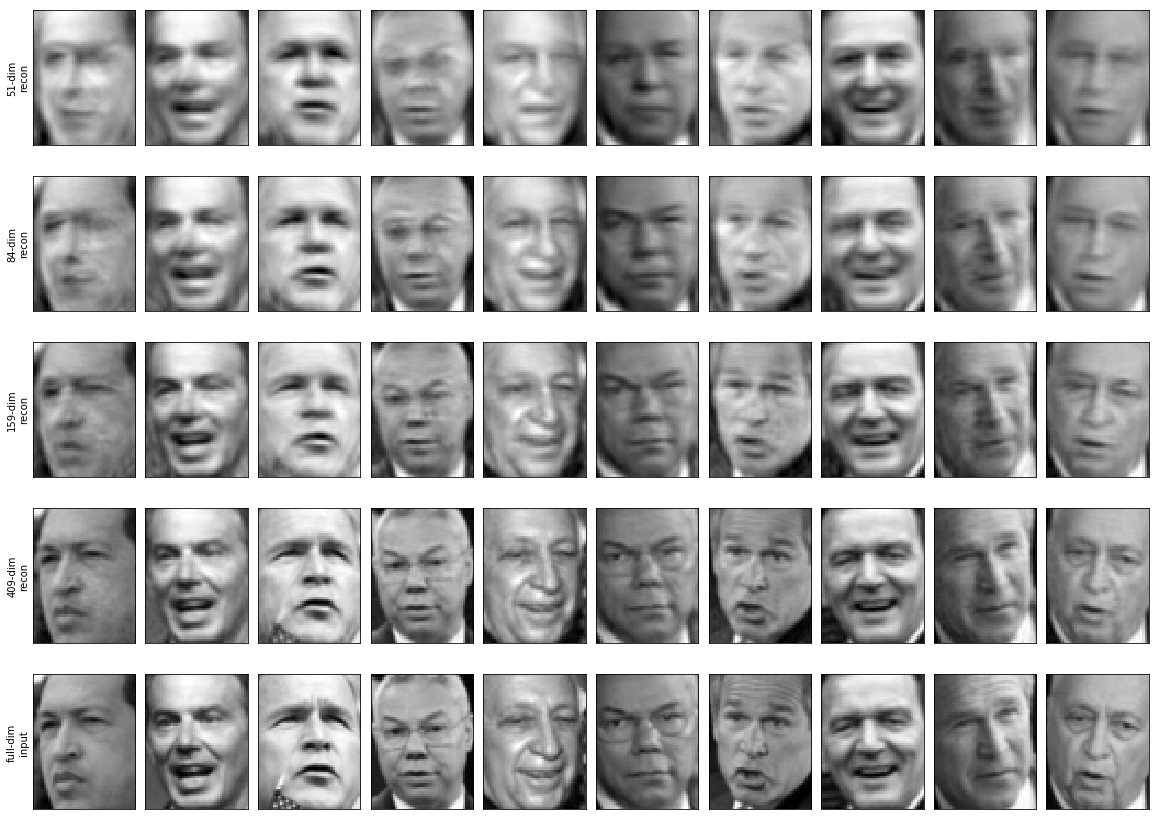

In [48]:
l = [0.85, 0.90, 0.95,0.99]
fig, ax = plt.subplots(len(l) + 1, 10, figsize=(20, 15),subplot_kw={'xticks':[], 'yticks':[]},gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i in range(len(l)):
    ncp = np.searchsorted(arr, l[i])
    pca = PCA(n_components = ncp, svd_solver='randomized')
    pca.fit(X)
    components = pca.transform(faces.data)
    projected = pca.inverse_transform(components)
    
    for j in range(10):
        ax[i, j].imshow(projected[j].reshape(62, 47), cmap='binary_r')
    
ax[len(l), 0].set_ylabel('full-dim\ninput')
for i in range(0, len(l)):
    string = str(np.searchsorted(arr, l[i])) + '-dim\nrecon'
    ax[i, 0].set_ylabel(string)
for j in range(10):
        ax[len(l), j].imshow(faces.data[j].reshape(62, 47), cmap='binary_r')
fig.savefig('faces.png')